In [1]:
#!/usr/bin/env python3

"""
Created on Mon Oct  4 14:54:00 2021
@author: robertamarinei
"""  

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplotlib
from datetime import datetime
from scipy.stats import norm

path =  "./"
in_evt = 0         # remove first events
tot_evt = 0        
volt_lim = -0.009

filetype = 0

if (filetype == 0):
    Amp_good_int = 0.00007 
    Max_good_int = 0.005 
    trig_offset = 0.                  # -3.e-5     # Seconds. i.e. trigger offset is centred on the middle of the screen.
    f = open(path+"result.txt",'r')


In [2]:
ampl_TPC = []
time_TPC = []
all_ampl_TPC = []
ampl_Scint = []
time_Scint = []
dum_wf_sum = 0
wf_sum_Scint = []
wf_sum_TPC = []
time_st = []
bin_info =[]
Int_aft = []
Int_bef = []
Max_aft = []
Max_bef = []
sat_evt = []
sat_evt2 = []
good_evt = []
good_evt_bef = []
evt_no = []

#read data and store them in a list of list
dis = f.readlines()
f.close()

evt0 = -1 

for i in dis:
        evt_,ch_,time_,ampl_ = i.split(',')
        if( evt0 < int(evt_) ): # initialize new events for every new one. 
            evt0 = int(evt_)
            ampl_TPC.append([])    
            time_TPC.append([])
            ampl_Scint.append([])
            time_Scint.append([])
            Max_bef.append(-1)
            Max_aft.append(-1)
            evt_no.append(evt0)
            Int_bef.append(0)
            Int_aft.append(0)
        if (ch_ == "C4"):
                ampl_TPC[int(evt_)].append(float(ampl_))
                time_TPC[int(evt_)].append(float(time_))
        elif (ch_ == "C1"): 
                ampl_Scint[int(evt_)].append(float(ampl_))   
                time_Scint[int(evt_)].append(float(time_))

tot_evt=int(evt_)+1  # Total number of events. 

for i in range(len(ampl_TPC[0])):
    wf_sum_Scint.append(0)
    wf_sum_TPC.append(0)
    
print(len(ampl_TPC),tot_evt)

80 80


In [3]:
norm_bef = 0.
norm_aft = 0. 

#    wf_sum_Scint.append(dum_wf_sum) 
#    wf_sum_TPC.append(dum_wf_sum_TPC)    
#    time_st.append(time_Scint[0][i])

fake_trigger = 0
good_trigger = 0
#--------------------
#for loop for the integrals before and after the trigger offset 
#--------------------

for i in  range(in_evt,tot_evt):
    for j in range(len(ampl_TPC[0])):
        if (time_TPC[i][j]<trig_offset-1e-6): 
            Int_bef[i]+=abs(ampl_TPC[i][j])
            norm_bef = norm_bef+1
            if( Max_bef[i] < abs(ampl_TPC[i][j]) ): Max_bef[i] = abs(ampl_TPC[i][j])
        elif (time_TPC[i][j]>trig_offset+1.e-6): 
            Int_aft[i]+=abs(ampl_TPC[i][j])
            norm_aft = norm_aft+1
            if( Max_aft[i] < abs(ampl_TPC[i][j]) ): Max_aft[i] = abs(ampl_TPC[i][j])
            
for j in range(len(Int_aft)): 
    Int_aft[j] = Int_aft[j]/norm_aft      
    Int_bef[j] = Int_bef[j]/norm_bef
            
#--------------------
#determine which events are saturated and store them in sat_evt list
#--------------------
for i in range(in_evt,tot_evt):
    if (Int_aft[i] > 0.2): #0.002 in Federio's initial code. 0.2 with the data using the amplifier
#        print ("method 1", evt_no[i], Int_aft[i])
        sat_evt.append(evt_no[i])
    else: 
        if( Int_aft[i] > Amp_good_int and  Max_aft[i] > Max_good_int ):
#             print ("Good trigger ", evt_no[i], Int_aft[i])
             good_evt.append(evt_no[i])
        
        if( Int_bef[i] > Amp_good_int and  Max_bef[i] > Max_good_int ):
#             print ("Good trigger before ", evt_no[i], Int_bef[i])
             good_evt_bef.append(evt_no[i])
        
#--------------------
#Do the waveform sum 
#--------------------
for i in  range(in_evt,tot_evt):
    if i in sat_evt:
        continue
    else: 
        for j in range(len(ampl_TPC[0])):
            all_ampl_TPC.append(ampl_Scint[i][j])
            wf_sum_Scint[j] += ampl_Scint[i][j]
            wf_sum_TPC[j] += ampl_TPC[i][j]

time_st = time_Scint[0] 

print ("good trigger events: ", len(good_evt), "out of ",len(ampl_TPC))
print ("good trigger before events: ", len(good_evt_bef), "out of ",len(ampl_TPC))
print ("saturation trigger events: ", len(sat_evt), "out of ",len(ampl_TPC))



good trigger events:  80 out of  80
good trigger before events:  80 out of  80
saturation trigger events:  0 out of  80


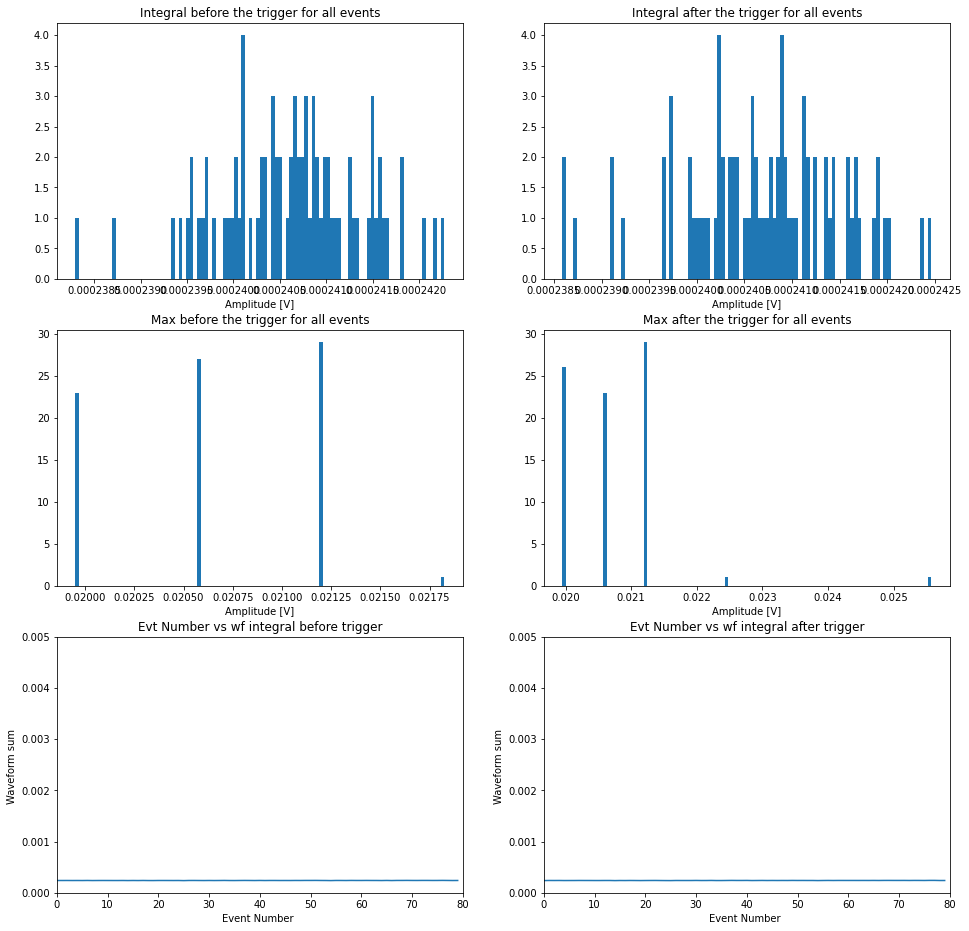

In [4]:
int_hist, int_hist_s = plt.subplots(3, 2, figsize=(16, 16), sharey=False)
int_hist_s[0][0].hist(Int_bef,bins=100)
int_hist_s[0][0].set_title("Integral before the trigger for all events")
int_hist_s[0][0].set_xlabel("Amplitude [V]")
int_hist_s[0][1].hist(Int_aft,bins=100)
int_hist_s[0][1].set_title("Integral after the trigger for all events")
int_hist_s[0][1].set_xlabel("Amplitude [V]")
int_hist_s[1][0].hist(Max_bef,bins=100)
int_hist_s[1][0].set_title("Max before the trigger for all events")
int_hist_s[1][0].set_xlabel("Amplitude [V]")
int_hist_s[1][1].hist(Max_aft,bins=100)
int_hist_s[1][1].set_title("Max after the trigger for all events")
int_hist_s[1][1].set_xlabel("Amplitude [V]")
int_hist_s[2][1].plot(evt_no,Int_aft)
int_hist_s[2][1].axis([0,tot_evt,0,0.0050])
int_hist_s[2][1].set_title("Evt Number vs wf integral after trigger")
int_hist_s[2][1].set_xlabel("Event Number ")
int_hist_s[2][1].set_ylabel("Waveform sum ")
int_hist_s[2][0].plot(evt_no,Int_bef)
int_hist_s[2][0].axis([0,tot_evt,0,0.0050])
int_hist_s[2][0].set_title("Evt Number vs wf integral before trigger")
int_hist_s[2][0].set_xlabel("Event Number ")
int_hist_s[2][0].set_ylabel("Waveform sum ")
int_hist.savefig(path+"integrals.pdf")

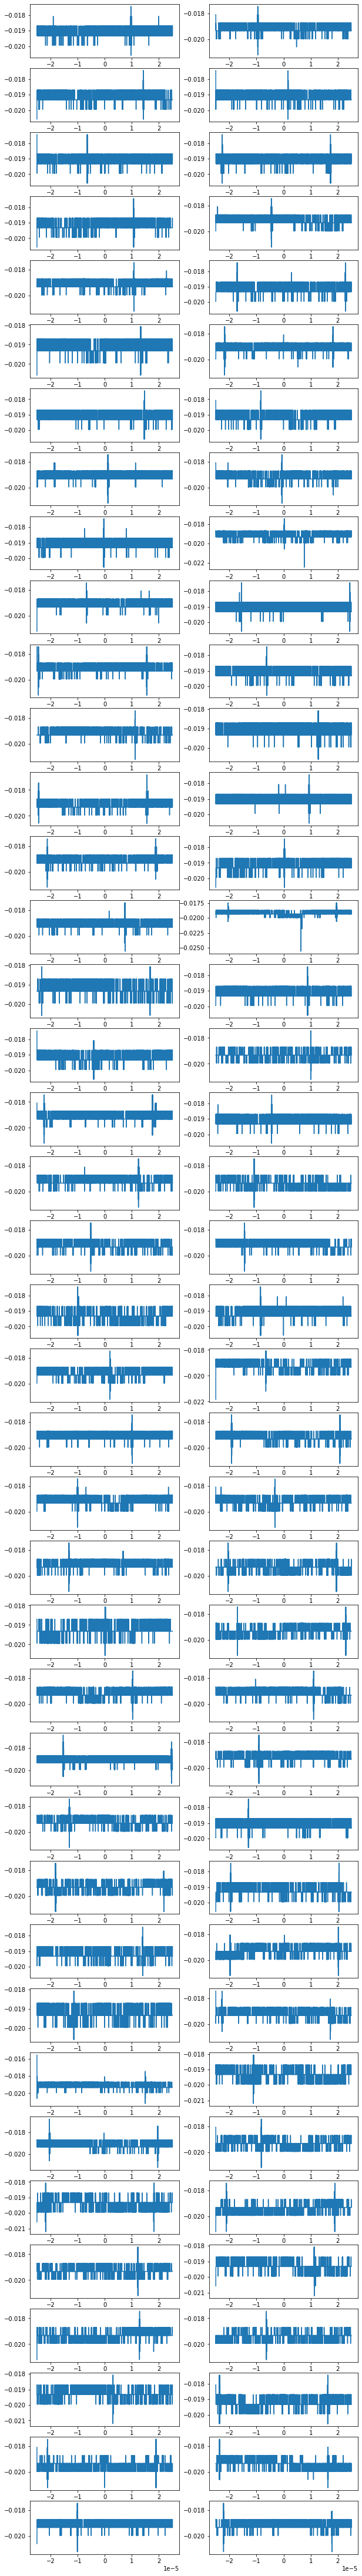

80
80


In [5]:
total_plots = len(good_evt)

plt.figure(figsize=(10,total_plots*2))

for i in range(0,total_plots):
    plt.subplot(total_plots,2,i+1)
    plt.plot(time_TPC[good_evt[i]],ampl_TPC[good_evt[i]])
       #     plt.plot(time_TPC[good_evt[i]],ampl_Scint[good_evt[i]])

plt.savefig(path+"good_events.pdf")            
plt.show()

print(len(evt_no))
print(len(good_evt))

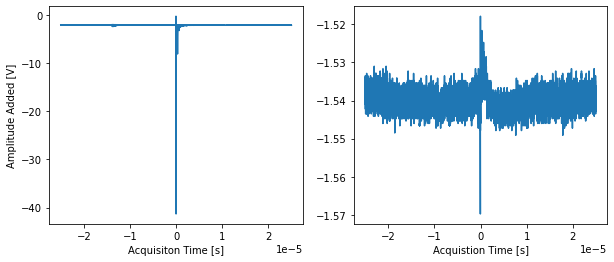

In [10]:

#plt.bar(time_TPC[0], wf_sum)
#plt.bar(x,y)
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=False)
# Set common labels

axs[0].set_xlabel('Acquisiton Time [s]')
axs[0].set_ylabel('Amplitude Added [V]')
axs[1].set_xlabel('Acquistion Time [s]')
axs[0].plot(time_st, wf_sum_Scint)
axs[1].plot(time_st,wf_sum_TPC)
fig.savefig(path+"wf_added.pdf")



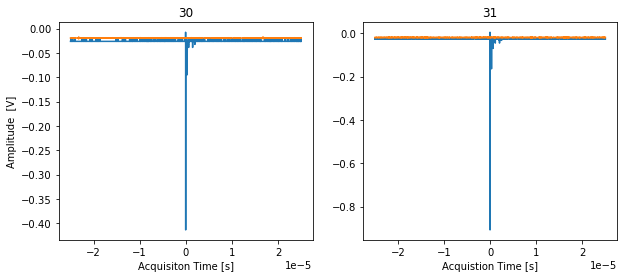

In [11]:


fig2, axs2 = plt.subplots(1, 2, figsize=(10, 4), sharey=False)
axs2[0].set_xlabel('Acquisiton Time [s]')
axs2[0].set_ylabel('Amplitude  [V]')
axs2[1].set_xlabel('Acquistion Time [s]')
evt_pl =30
axs2[0].set_title(evt_pl)
axs2[1].set_title(evt_pl +1)

axs2[0].plot(time_Scint[4],ampl_Scint[evt_pl])
axs2[0].plot(time_TPC[4],ampl_TPC[evt_pl])


axs2[1].plot(time_Scint[4],ampl_Scint[evt_pl+1])
axs2[1].plot(time_TPC[4],ampl_TPC[evt_pl +1])

fig2.savefig(path+"single_events.pdf")



In [13]:
# import pandas
import pandas as pd
if( len(sat_evt) > 0 ): 
    # create figure and axis objects with subplots()
    fig,ax = plt.subplots()
    evt_pl = sat_evt[2]
    ax.set_title(evt_pl)
    # make a plot
    ax.plot(time_Scint[4],ampl_Scint[evt_pl])
    # set x-axis label
    ax.set_xlabel("Acquisition Window [us]",fontsize=14)
    # set y-axis label
    ax.set_ylabel("Scintillator Amplitude",color="blue",fontsize=14)
    #Next we use twinx() function to create the second axis object “ax2”. Now we use the second axis object “ax2” to make plot of the second y-axis variable and update their labels.
    # twin object for two different y-axis on the sample plot

    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(time_TPC[4],ampl_TPC[evt_pl], color = "red")
    ax2.set_ylabel("TPC Amplitude",color="red",fontsize=14)
    plt.show()
    # save the plot as a file
    fig.savefig(path+'single_event_diff_axis.pdf',
            format='pdf', bbox_inches='tight')

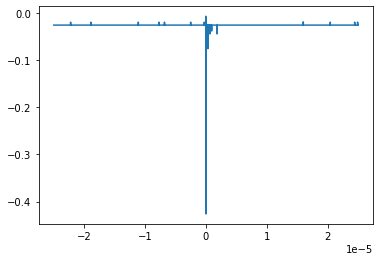

In [14]:
plt.plot(time_TPC[1],ampl_Scint[1])